In [31]:
# ---------------------------
# 1. Import Libraries
# ---------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import shap
import pickle
import warnings
warnings.filterwarnings("ignore")


In [2]:
!pip install xgboost


   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   -----------------

In [4]:
!pip install shap

   ---------------------------------------- 0.0/545.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.1 kB ? eta -:--:--
   ------------------- -------------------- 262.1/545.1 kB ? eta -:--:--
   ------------------- -------------------- 262.1/545.1 kB ? eta -:--:--
   ------------------- -------------------- 262.1/545.1 kB ? eta -:--:--
   ------------------- -------------------- 262.1/545.1 kB ? eta -:--:--
   ------------------- -------------------- 262.1/545.1 kB ? eta -:--

In [20]:
# ---------------------------
# 2. Load Dataset
# ---------------------------
df = pd.read_csv("../dataset/data.csv")
df = df.sample(n=20000, random_state=42)
print("Dataset shape:", df.shape)
df

Dataset shape: (20000, 48)


,survey_code,age,gender,height,weight,bmi,bmi_estimated,bmi_scaled,bmi_corrected,waist_size,...,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,electrolyte_level,gene_marker_flag,environmental_risk_score,daily_supplement_dosage,target
75721,75722,67,Female,149.947350,74.182989,32.993375,32.993375,98.980124,33.095797,98.443866,...,Moderate,1,NaN,Yes,No,0,1.0,5.5,0.093056,healthy
80184,80185,62,Female,182.985926,71.861567,21.461561,21.461561,64.384683,21.270616,84.652929,...,Low,5,High,No,No,0,1.0,5.5,2.498928,diseased
19864,19865,44,Male,169.587159,63.328076,22.019647,22.019647,66.058942,21.827908,96.357967,...,Moderate,1,Moderate,Yes,Yes,0,1.0,5.5,5.504497,diseased
76699,76700,28,Male,174.371372,67.472986,22.191137,22.191137,66.573412,21.700315,72.028068,...,High,1,Moderate,Yes,Yes,0,1.0,5.5,-9.555787,diseased
92991,92992,38,Male,174.312119,87.895994,28.927701,28.927701,86.783103,28.797809,89.929984,...,Low,1,Moderate,Yes,No,0,NaN,5.5,6.062943,diseased
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32595,32596,66,Female,172.122194,59.368912,20.039429,20.039429,60.118287,20.295729,85.882576,...,Moderate,2,Moderate,No,Yes,0,1.0,5.5,-9.103012,healthy
29313,29314,48,Female,144.603899,86.489672,41.362258,41.362258,124.086775,41.235225,91.334215,...,High,2,NaN,Yes,Yes,0,1.0,5.5,9.286235,healthy
37862,37863,64,Male,169.781480,73.512932,25.502521,25.502521,76.507563,25.540189,85.860209,...,High,2,High,Yes,No,0,1.0,5.5,-0.192586,diseased
53421,53422,49,Female,167.441602,49.385552,17.614616,17.614616,52.843847,17.215230,85.643188,...,Low,4,Moderate,No,No,0,1.0,5.5,3.029906,healthy


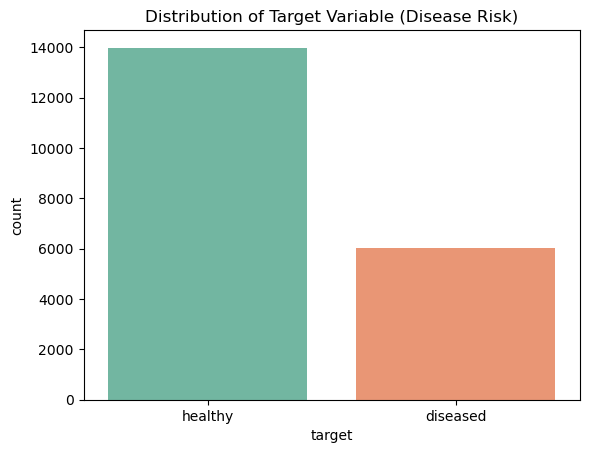

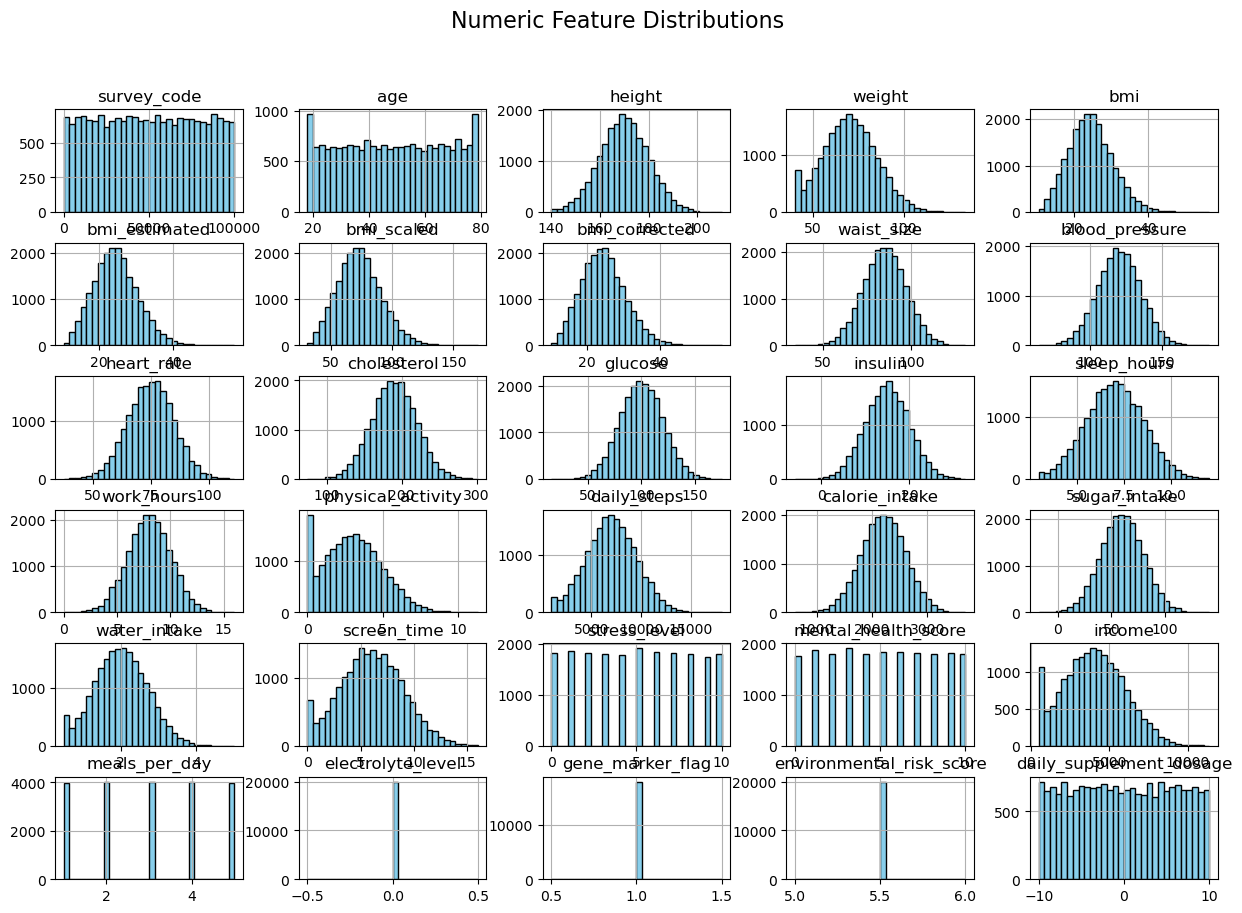

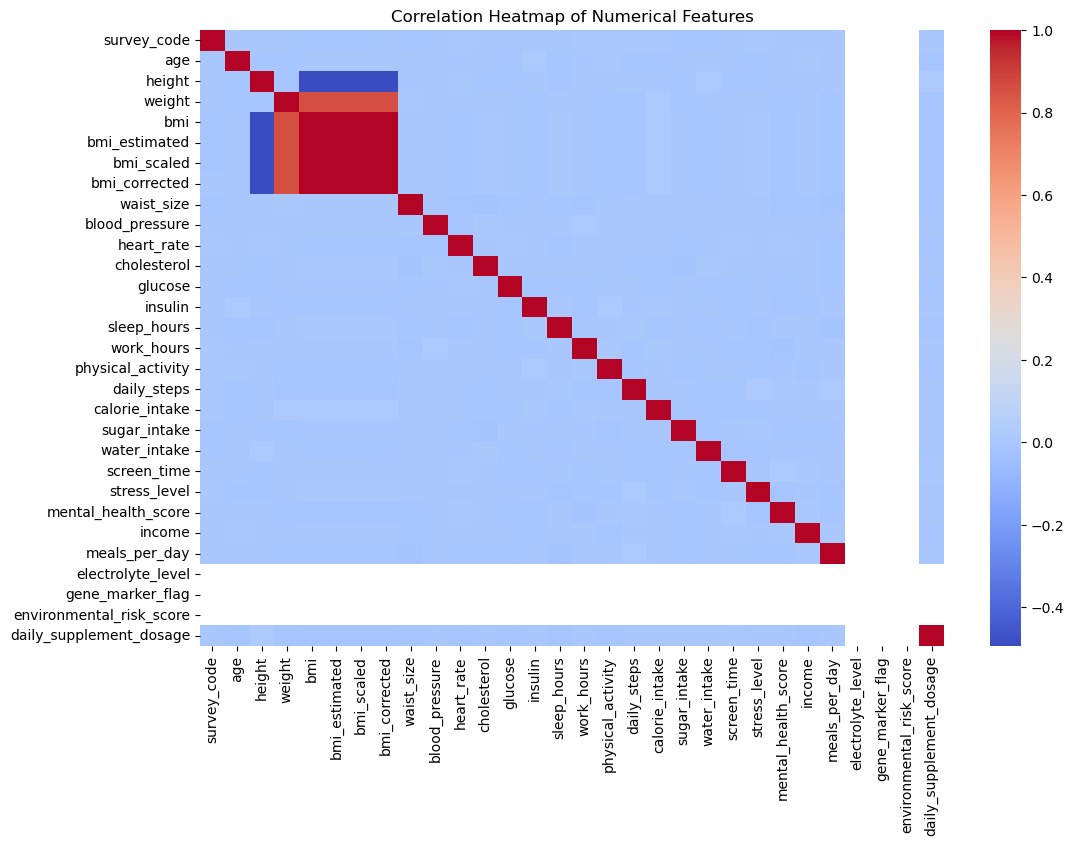

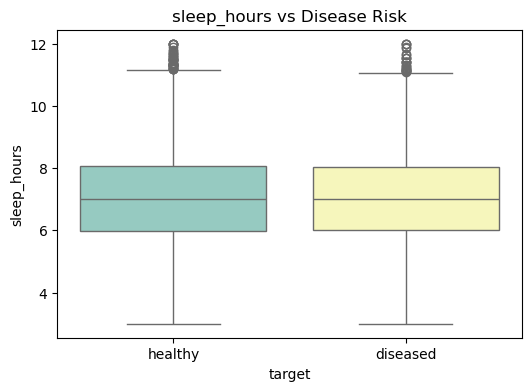

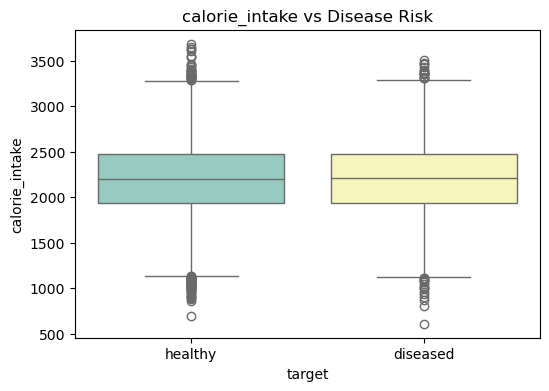

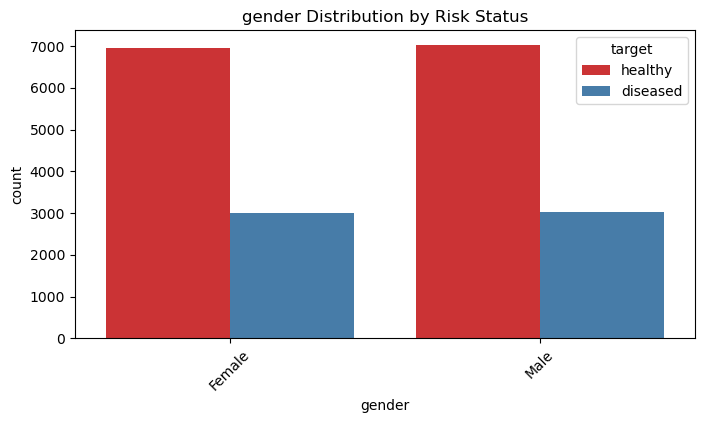

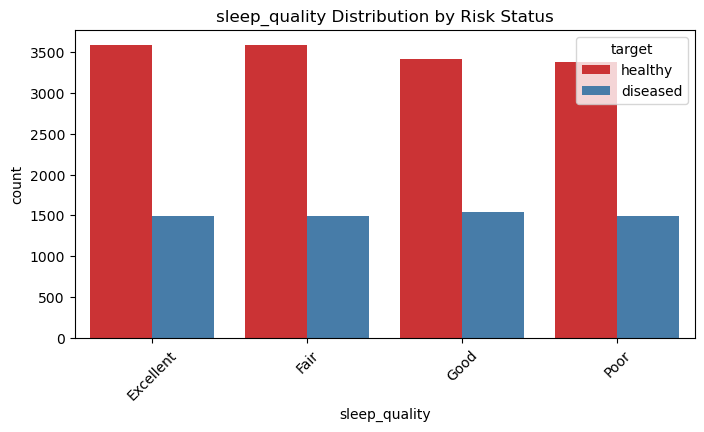

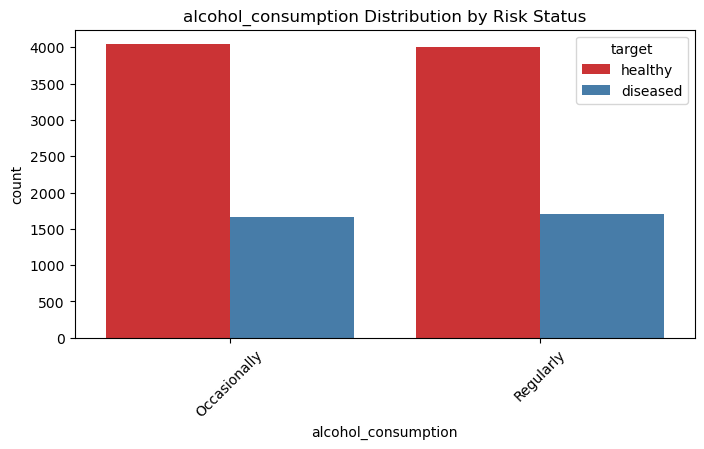

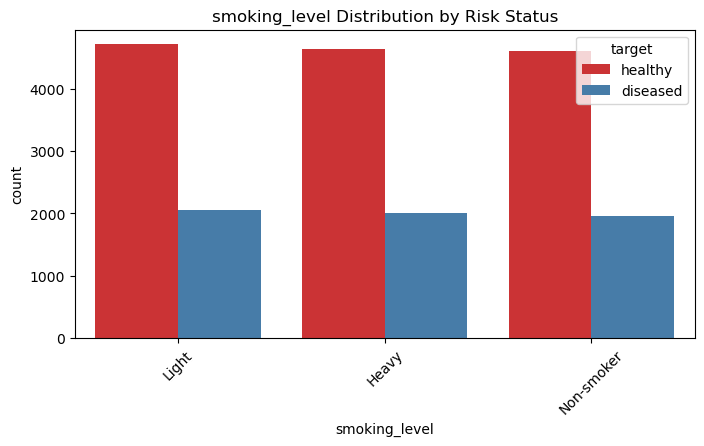

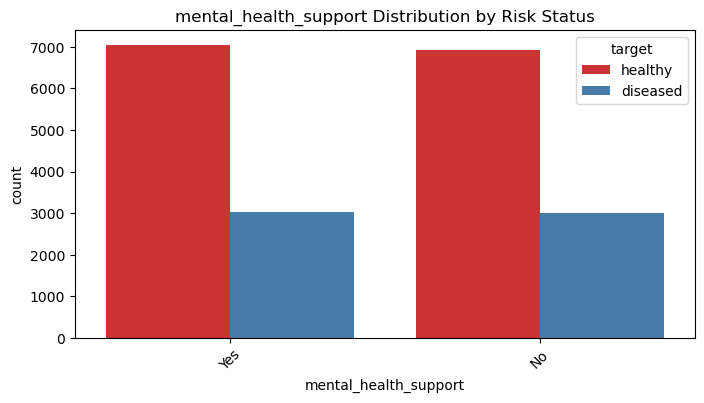

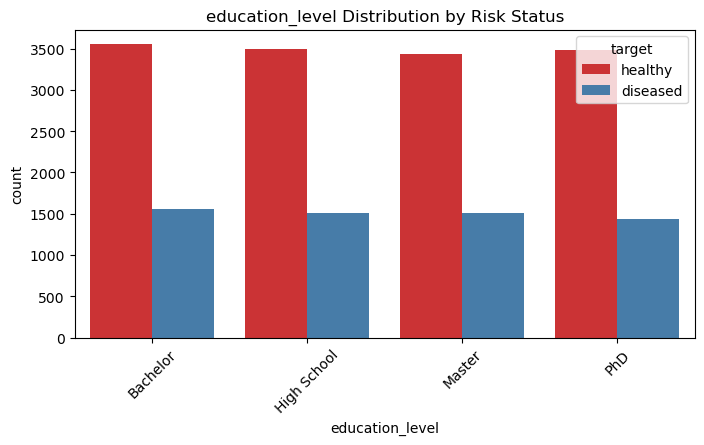

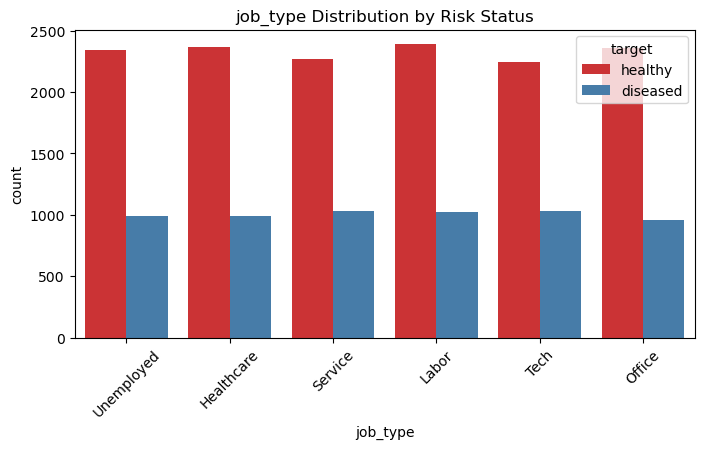

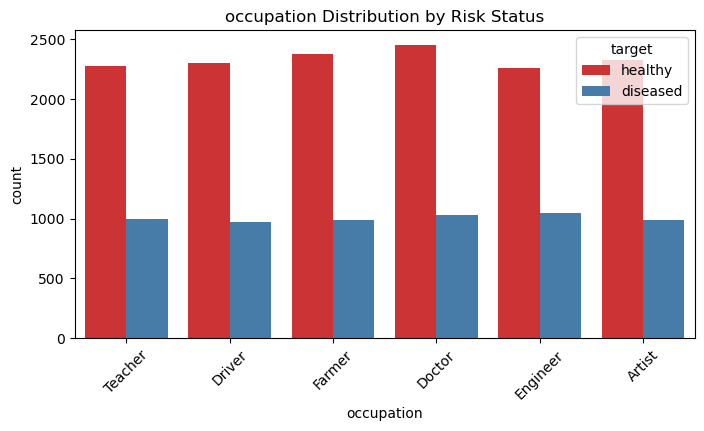

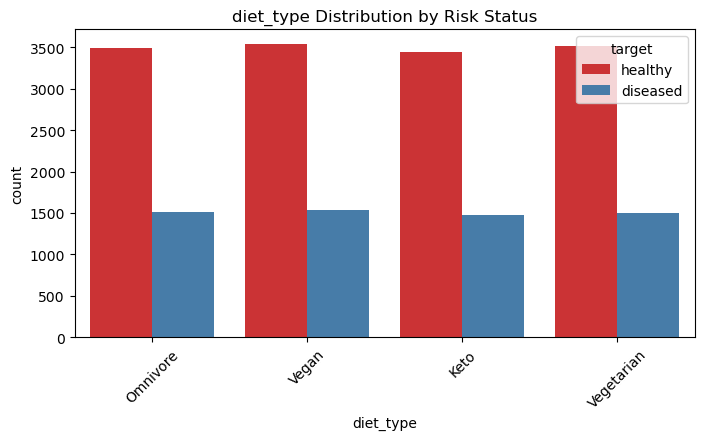

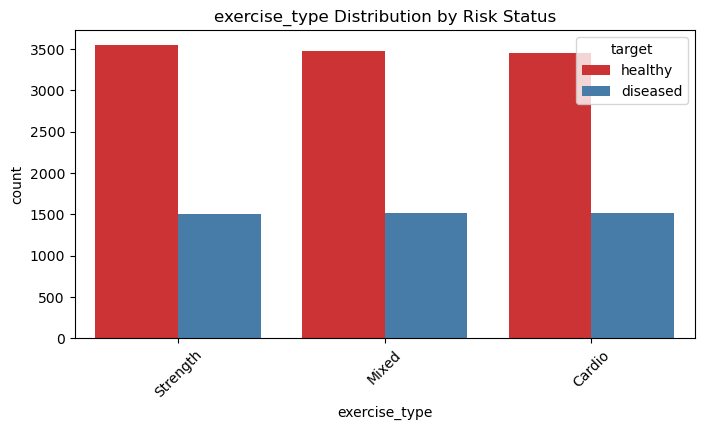

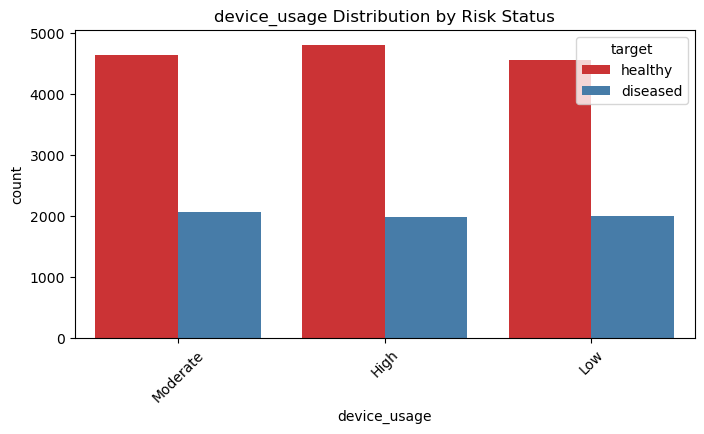

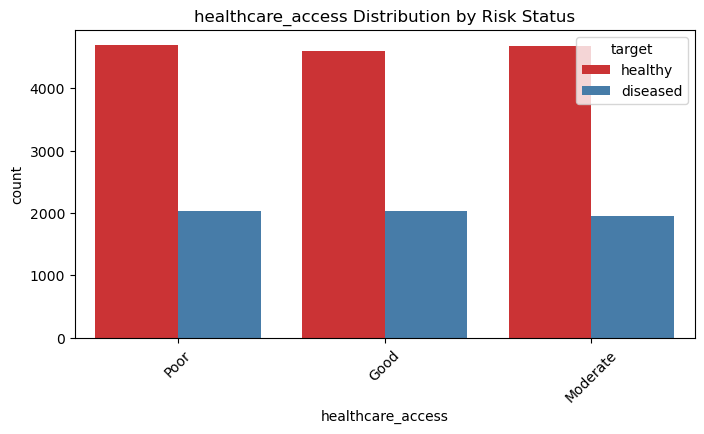

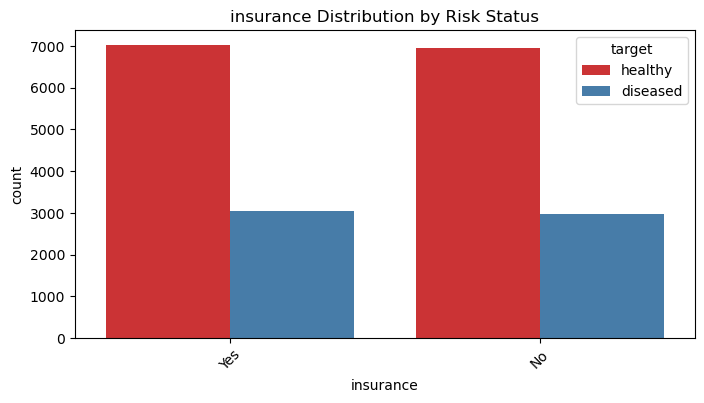

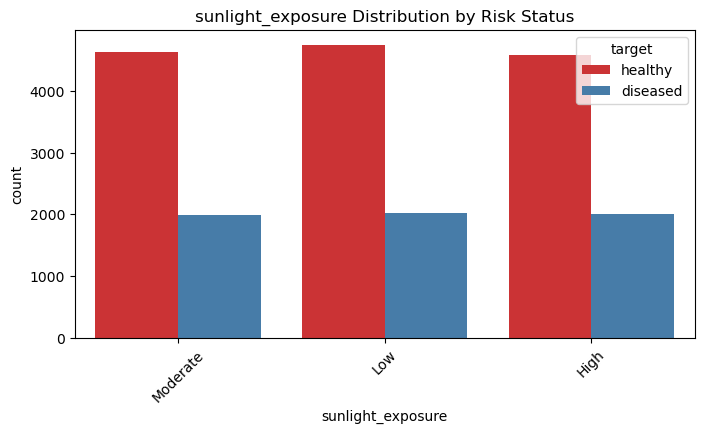

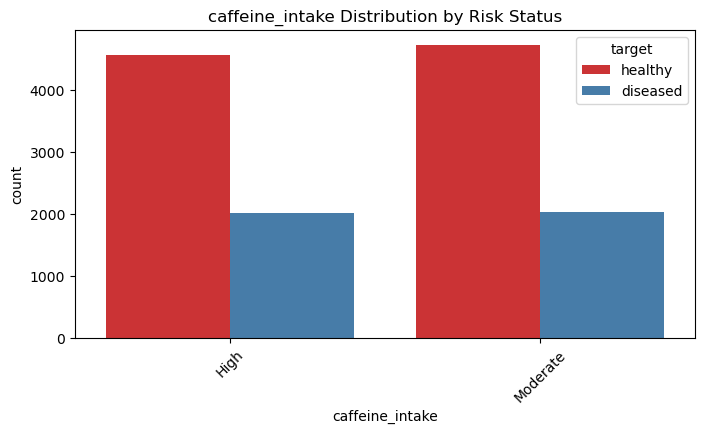

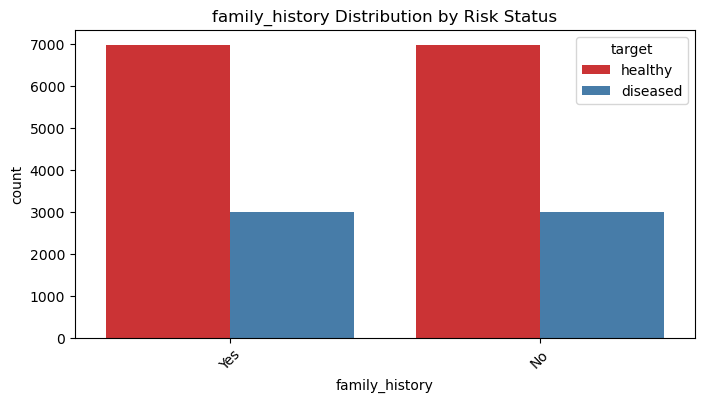

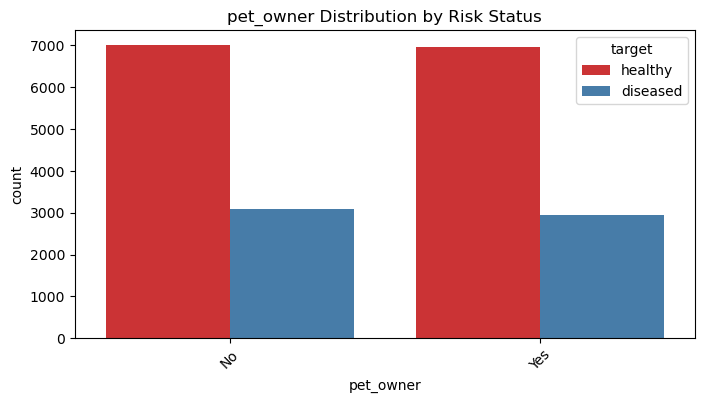

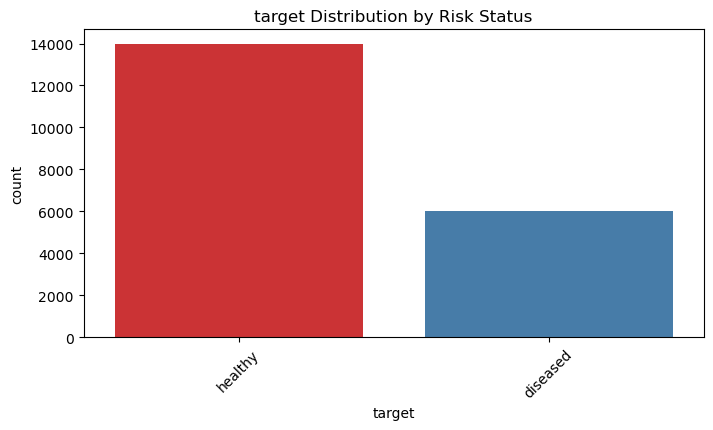

In [21]:
# ---------------------------
# 3. Exploratory Data Analysis (EDA)
# ---------------------------

# Class balance
sns.countplot(x="target", data=df, palette="Set2")
plt.title("Distribution of Target Variable (Disease Risk)")
plt.show()

# Numeric features distribution
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols].hist(figsize=(15, 10), bins=30, color="skyblue", edgecolor="black")
plt.suptitle("Numeric Feature Distributions", fontsize=16)
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols].corr(), annot=False, cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# Boxplots for selected metrics
for col in ["BMI", "sleep_hours", "calorie_intake"]:
    if col in df.columns:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x="target", y=col, data=df, palette="Set3")
        plt.title(f"{col} vs Disease Risk")
        plt.show()

# Relationship between categorical variables and risk
for col in df.select_dtypes(include=['object']).columns:
    if col != "disease_risk":
        plt.figure(figsize=(8, 4))
        sns.countplot(x=col, hue="target", data=df, palette="Set1")
        plt.title(f"{col} Distribution by Risk Status")
        plt.xticks(rotation=45)
        plt.show()

In [36]:
# ---------------------------
# 4. Data Cleaning & Preprocessing
# ---------------------------

# Encode categorical features
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    if col != 'target':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le

# Target encoding
y = LabelEncoder().fit_transform(df['target'])
X = df.drop("target", axis=1)

# Handle missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Handle imbalance with SMOTE
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=42)
X_train, y_train = smt.fit_resample(X_train, y_train)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [23]:
# ---------------------------
# 5. Baseline Models
# ---------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight="balanced"),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced"),
    "XGBoost": XGBClassifier(eval_metric="logloss", random_state=42, scale_pos_weight=len(y_train[y_train==0])/len(y_train[y_train==1]))
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_pred)
    }

pd.DataFrame(results).T

,Accuracy,Precision,Recall,F1,ROC-AUC
Logistic Regression,0.51175,0.708210,0.512343,0.594561,0.511358
Random Forest,0.69875,0.698849,0.999642,0.822612,0.500236
XGBoost,0.65725,0.694642,0.909123,0.787541,0.491076


In [37]:
# ---------------------------
# 6. Hyperparameter Tuning (Random Forest)
# ---------------------------
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42, class_weight="balanced"),
                       param_grid, cv=3, scoring="balanced_accuracy", n_jobs=-1, verbose=1)
grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
print("Best Random Forest Params:", grid_rf.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Random Forest Params: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 300}



=== Default Threshold (0.5) ===
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1205
           1       0.70      1.00      0.82      2795

    accuracy                           0.70      4000
   macro avg       0.35      0.50      0.41      4000
weighted avg       0.49      0.70      0.57      4000


=== Threshold = 0.6 ===
              precision    recall  f1-score   support

           0       0.31      0.12      0.17      1205
           1       0.70      0.89      0.78      2795

    accuracy                           0.66      4000
   macro avg       0.51      0.50      0.48      4000
weighted avg       0.58      0.66      0.60      4000


Best Threshold by F1: 0.5118576451046741

=== Best Threshold Results ===
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1205
           1       0.70      1.00      0.82      2795

    accuracy                           0.70      4

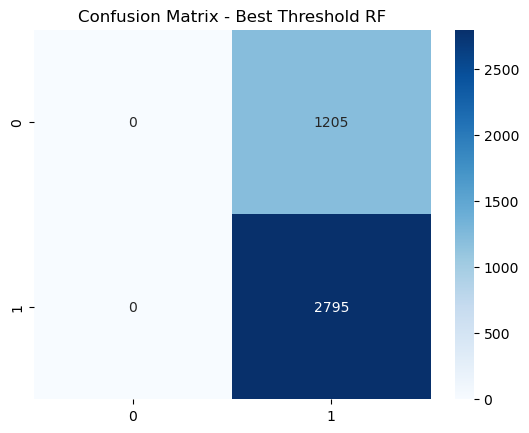

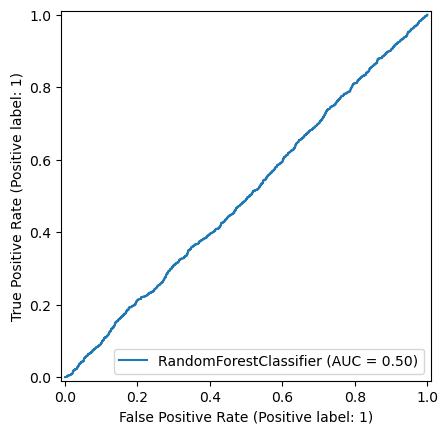

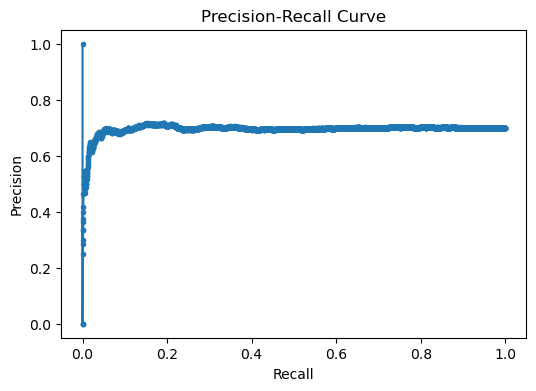

In [42]:
# ---------------------------
# 7. Evaluation on Test Set
# ---------------------------

y_proba = best_rf.predict_proba(X_test)[:,1]

# Default threshold 0.5
y_pred_default = (y_proba >= 0.5).astype(int)
print("\n=== Default Threshold (0.5) ===")
print(classification_report(y_test, y_pred_default))

# Try threshold = 0.6
y_pred_06 = (y_proba >= 0.6).astype(int)
print("\n=== Threshold = 0.6 ===")
print(classification_report(y_test, y_pred_06))

# Find best threshold by F1
prec, rec, thresh = precision_recall_curve(y_test, y_proba)
f1_scores = 2*prec*rec/(prec+rec+1e-6)
best_idx = f1_scores.argmax()
best_threshold = thresh[best_idx]

print("\nBest Threshold by F1:", best_threshold)
y_pred_best = (y_proba >= best_threshold).astype(int)
print("\n=== Best Threshold Results ===")
print(classification_report(y_test, y_pred_best))

# Confusion matrix for best threshold
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Best Threshold RF")
plt.show()

RocCurveDisplay.from_estimator(best_rf, X_test, y_test)
plt.show()


from sklearn.metrics import precision_recall_curve

y_proba = best_rf.predict_proba(X_test)[:,1]
prec, rec, thresh = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(6,4))
plt.plot(rec, prec, marker=".")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()



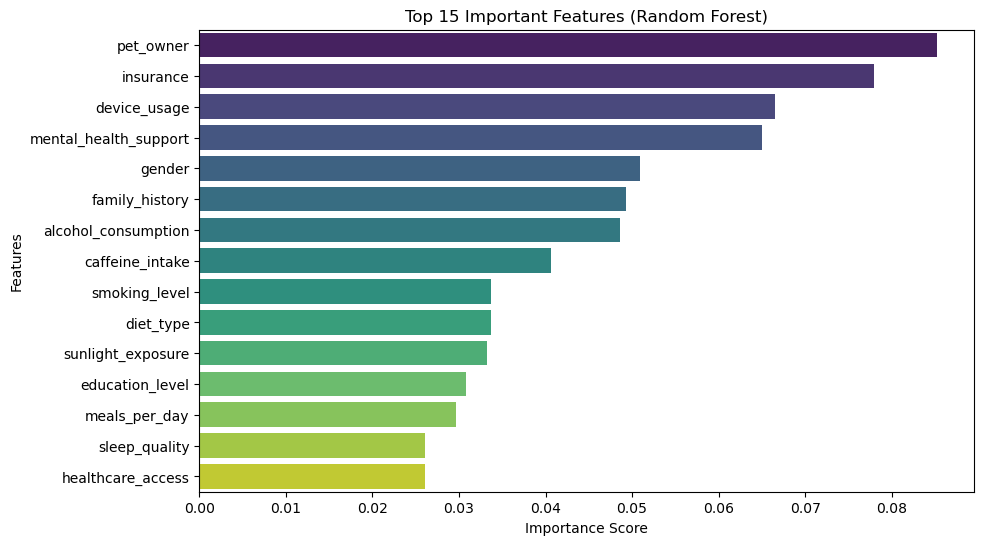

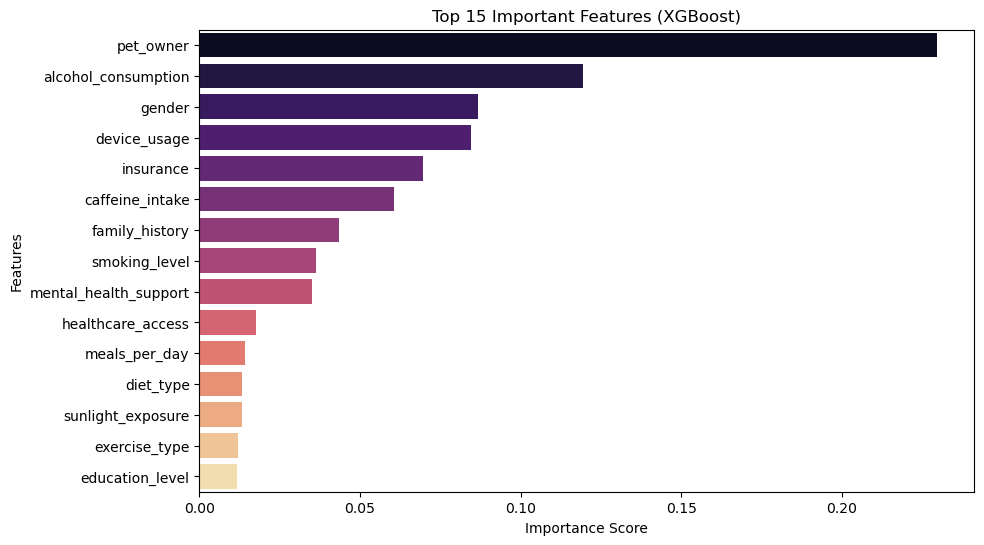

In [41]:
# ---------------------------
# 8. Feature Importance
# ---------------------------

# Random Forest Feature Importance
importances_rf = best_rf.feature_importances_
features = df.drop("target", axis=1).columns
rf_imp = pd.Series(importances_rf, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=rf_imp[:15], y=rf_imp.index[:15], palette="viridis")
plt.title("Top 15 Important Features (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# XGBoost Feature Importance
xgb = models["XGBoost"]
xgb.fit(X_train, y_train)

importances_xgb = xgb.feature_importances_
xgb_imp = pd.Series(importances_xgb, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=xgb_imp[:15], y=xgb_imp.index[:15], palette="magma")
plt.title("Top 15 Important Features (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

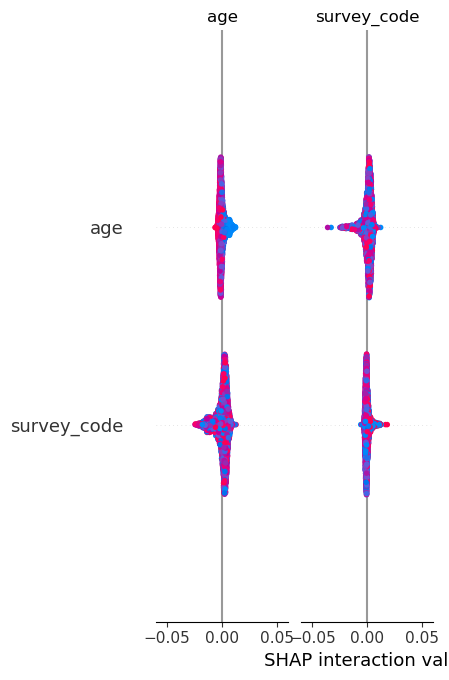

In [35]:
# ---------------------------
# 9. Explainability (SHAP)
# ---------------------------
explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(X_test)

# Handle list vs array automatically
if isinstance(shap_values, list):  
    shap.summary_plot(shap_values[1], X_test, feature_names=features)  # Class 1 (at-risk)
else:
    shap.summary_plot(shap_values, X_test, feature_names=features)


In [30]:
# ---------------------------
# 10. Save Final Model
# ---------------------------
with open("final_model.pkl", "wb") as f:
    pickle.dump(best_rf, f)

print("✅ Final model saved as final_model.pkl")

✅ Final model saved as final_model.pkl
